In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading dataset
dataset=pd.read_csv("/content/engine_dataset.csv")
dataset


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine_Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [3]:
#dataset informations
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine_Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [4]:
#checking the number of missing values in each column
dataset.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine_Condition    0
dtype: int64

In [5]:
#in the dataset class label for legit or legal transaction is marked as '0' and illegal is marked as '1'
dataset['Engine_Condition'].value_counts()

Engine_Condition
1    12317
0     7218
Name: count, dtype: int64

In [6]:
#seperating the dataset for analysis
working=dataset[dataset.Engine_Condition==1]
fault=dataset[dataset.Engine_Condition==0]

In [7]:
#printing both legit and fraud
print(working.shape)
print(fault.shape)

(12317, 7)
(7218, 7)


In [8]:
#statistical measures of the data
working.Engine_Condition.describe()

count    12317.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Engine_Condition, dtype: float64

In [9]:
#statistical measures of the data
fault.Engine_Condition.describe()

count    7218.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Engine_Condition, dtype: float64

In [10]:
#compare both the values of working and fault
dataset.groupby('Engine_Condition').mean()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
Engine_Condition,,,,,,
0,884.995012,3.222497,6.236310,2.367934,78.023934,78.803030
1,736.296582,3.351406,6.901337,2.316285,77.420432,78.207326


In [11]:
#dataset is imbalanced
working_sample=working.sample(n=7218)

In [12]:
#Concatenating both dataset
new_dataset=pd.concat([working_sample,fault],axis=0)
new_dataset

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine_Condition
17926,586,3.197443,5.408851,1.134403,76.424116,87.397149,1
7711,465,3.649530,9.688818,1.845561,74.005138,72.198525,1
16320,532,2.288475,6.232841,1.397903,77.633389,71.305656,1
4639,985,2.711192,5.134410,1.782258,76.035353,76.723391,1
481,726,2.510793,6.347151,2.250761,83.987508,65.609151,1
...,...,...,...,...,...,...,...
19511,561,2.398631,3.998412,3.105764,77.462929,83.992029,0
19512,710,2.620655,11.214721,2.636433,76.669624,72.884364,0
19516,882,2.392158,5.495176,2.983294,76.792912,72.268676,0
19522,629,1.949550,4.730967,1.471184,77.661168,92.551057,0


In [13]:
new_dataset['Engine_Condition'].value_counts()

Engine_Condition
1    7218
0    7218
Name: count, dtype: int64

In [14]:
#Splitting the dataset into "Features and "Targets"
X=new_dataset.drop(columns='Engine_Condition',axis=1)
Y=new_dataset['Engine_Condition']

In [15]:
print(X)

       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
17926         586          3.197443       5.408851          1.134403   
7711          465          3.649530       9.688818          1.845561   
16320         532          2.288475       6.232841          1.397903   
4639          985          2.711192       5.134410          1.782258   
481           726          2.510793       6.347151          2.250761   
...           ...               ...            ...               ...   
19511         561          2.398631       3.998412          3.105764   
19512         710          2.620655      11.214721          2.636433   
19516         882          2.392158       5.495176          2.983294   
19522         629          1.949550       4.730967          1.471184   
19529         797          3.368795       6.057227          1.721997   

       lub oil temp  Coolant temp  
17926     76.424116     87.397149  
7711      74.005138     72.198525  
16320     77.633389     71.

In [16]:
print(Y)

17926    1
7711     1
16320    1
4639     1
481      1
        ..
19511    0
19512    0
19516    0
19522    0
19529    0
Name: Engine_Condition, Length: 14436, dtype: int64


In [17]:
#Splitting the dataset into testing and training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)


In [18]:
print(X.shape,X_train.shape,X_test.shape)

(14436, 6) (11548, 6) (2888, 6)


In [19]:
#Training and building the model using logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, Y_train)
joblib.dump(model,'predictive-maintainence-LR.joblib')

['predictive-maintainence-LR.joblib']

In [20]:
# predicting_model_lr=joblib.load('/home/slayer/Desktop/8th Sem/IoT/JComponent/predictive-maintainence-LR.joblib')
predicting_model_lr=joblib.load('/content/predictive-maintainence-LR.joblib')
predictions=predicting_model_lr.predict([[700,2.6,11.709,3.17,84.11,81.63]])
if(predictions==1):
    print("Machine is working fine now!")
else:
    print("Machine is not working fine!")


Machine is working fine now!


In [21]:
#accuracy,precision,f1-score,recall for the model using logistic regression

X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuary of the training dataset is : ',training_data_accuracy*100,'%')

training_data_precision=precision_score(X_train_prediction,Y_train)
print('Precision of the training dataset is : ',training_data_precision*100,'%')

training_data_recall_score=recall_score(X_train_prediction,Y_train)
print('recall_score of the training dataset is : ',training_data_recall_score*100,'%')

training_data_f1_score=f1_score(X_train_prediction,Y_train)
print('f1_score of the training dataset is : ',training_data_f1_score*100,'%')

training_data_recall_score=recall_score(X_train_prediction,Y_train)
print('recall_score of the testing dataset is : ',training_data_recall_score*100,'%')

Accuary of the training dataset is :  63.42223761690337 %
Precision of the training dataset is :  66.71285071007966 %
recall_score of the training dataset is :  62.59343516412089 %
f1_score of the training dataset is :  64.58752515090544 %
recall_score of the testing dataset is :  62.59343516412089 %


In [22]:
#Making model using Decision Tree CLassifier
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier()
# model_dtc.fit(X_train, Y_train)

model_dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
model_dtc.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [23]:
joblib.dump(model_dtc,'predictive-maintainence-dtc.joblib')

['predictive-maintainence-dtc.joblib']

In [24]:
#predicting now
predicting_model_dtc=joblib.load('/content/predictive-maintainence-dtc.joblib')
predictions=predicting_model_dtc.predict([[700,2.6,11.709,3.17,84.11,81.63]])
if(predictions==1):
    print("Machine is working fine now!")
else:
    print("Machine is not working fine!")

Machine is not working fine!


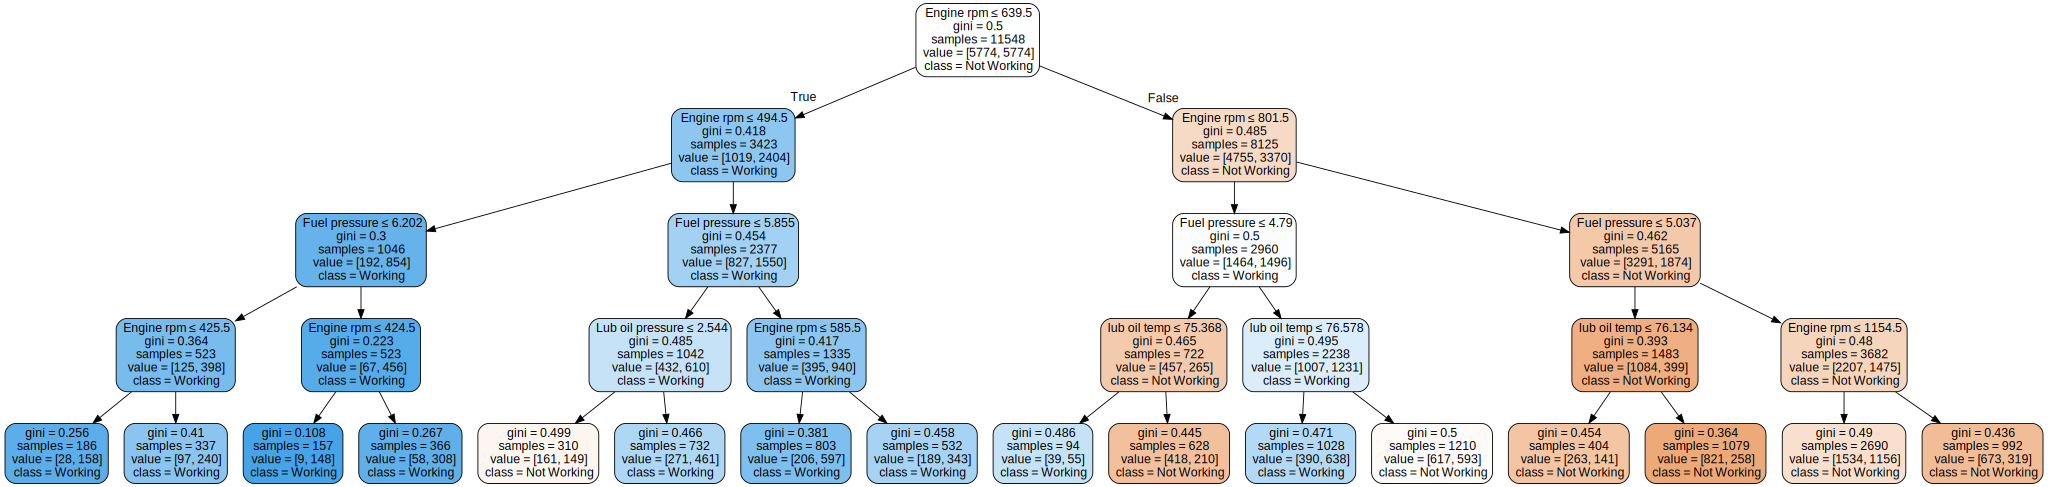

In [25]:
from sklearn.tree import export_graphviz
import graphviz

# Export as dot file
dot_data = export_graphviz(model_dtc, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Not Working', 'Working'],
                           filled=True, rounded=True,
                           special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")  # Save the tree as a PNG file

# Display the tree
graph

In [26]:
#accuracy,precision,f1-score,recall for the model using logistic regression

X_train_prediction_dtc=model_dtc.predict(X_train)
training_data_accuracy_dtc=accuracy_score(X_train_prediction_dtc,Y_train)
print('Accuary of the training dataset is : ',training_data_accuracy_dtc*100,'%')

training_data_precision_dtc=precision_score(X_train_prediction_dtc,Y_train)
print('Precision of the training dataset is : ',training_data_precision_dtc*100,'%')

training_data_recall_score_dtc=recall_score(X_train_prediction_dtc,Y_train)
print('recall_score of the training dataset is : ',training_data_recall_score_dtc*100,'%')

training_data_f1_score_dtc=f1_score(X_train_prediction_dtc,Y_train)
print('f1_score of the training dataset is : ',training_data_f1_score_dtc*100,'%')


Accuary of the training dataset is :  64.38344302043643 %
Precision of the training dataset is :  51.05645999307239 %
recall_score of the training dataset is :  69.61038961038962 %
f1_score of the training dataset is :  58.9069837146568 %


In [27]:
#Making Model Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [28]:
joblib.dump(model_rfc,'predictive-maintainence-rfc.joblib')


['predictive-maintainence-rfc.joblib']

In [29]:
#predicting now
predicting_model_rfc=joblib.load('/content/predictive-maintainence-rfc.joblib')
predictions=predicting_model_rfc.predict([[700,2.6,11.709,3.17,84.11,81.63]])
if(predictions==1):
    print("Machine is working fine now!")
else:
    print("Machine is not working fine!")

Machine is working fine now!


In [30]:
#accuracy,precision,f1-score,recall for the model using random forest

X_train_prediction_rfc=model_rfc.predict(X_train)
training_data_accuracy_rfc=accuracy_score(X_train_prediction_rfc,Y_train)
print('Accuary of the training dataset is : ',training_data_accuracy_rfc*100,'%')

training_data_precision_rfc=precision_score(X_train_prediction_rfc,Y_train)
print('Precision of the training dataset is : ',training_data_precision_rfc*100,'%')

training_data_recall_score_rfc=recall_score(X_train_prediction_rfc,Y_train)
print('recall_score of the training dataset is : ',training_data_recall_score_rfc*100,'%')

training_data_f1_score_rfc=f1_score(X_train_prediction_rfc,Y_train)
print('f1_score of the training dataset is : ',training_data_f1_score_rfc*100,'%')


Accuary of the training dataset is :  100.0 %
Precision of the training dataset is :  100.0 %
recall_score of the training dataset is :  100.0 %
f1_score of the training dataset is :  100.0 %


In [31]:
from sklearn.svm import LinearSVC
import joblib

# Initialize and train the SVM model
model_svm = LinearSVC()  # More efficient for large datasets with linear kernel requirement
model_svm.fit(X_train, Y_train)

# Save the trained model
joblib.dump(model_svm, 'predictive-maintainence-svm.joblib')

['predictive-maintainence-svm.joblib']

In [32]:
# Load the trained model
loaded_model_svm = joblib.load('predictive-maintainence-svm.joblib')

# Predicting using the loaded model
predictions_svm = loaded_model_svm.predict([[700, 2.6, 11.709, 3.17, 84.11, 81.63]])
if predictions_svm[0] == 1:
    print("Machine is working fine now!")
else:
    print("Machine is not working fine!")


Machine is not working fine!


In [33]:
# Predicting on the training dataset
X_train_prediction_svm = model_svm.predict(X_train)

# Calculating metrics on the training data
training_data_accuracy_svm = accuracy_score(Y_train, X_train_prediction_svm)
print('Accuracy of the training dataset is : ', training_data_accuracy_svm * 100, '%')

training_data_precision_svm = precision_score(Y_train, X_train_prediction_svm)
print('Precision of the training dataset is : ', training_data_precision_svm * 100, '%')

training_data_recall_svm = recall_score(Y_train, X_train_prediction_svm)
print('Recall score of the training dataset is : ', training_data_recall_svm * 100, '%')

training_data_f1_score_svm = f1_score(Y_train, X_train_prediction_svm)
print('F1 score of the training dataset is : ', training_data_f1_score_svm * 100, '%')

Accuracy of the training dataset is :  60.40006927606512 %
Precision of the training dataset is :  74.20395002015316 %
Recall score of the training dataset is :  31.884308971250437 %
F1 score of the training dataset is :  44.60327074500304 %


In [34]:
#Exploratory data analysis

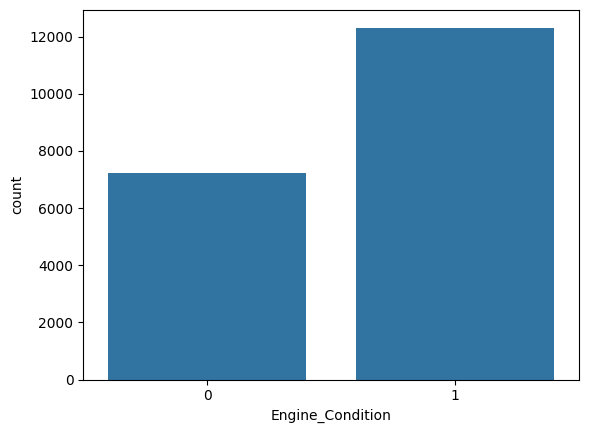

In [35]:
# Read the dataset
df = pd.read_csv('/content/engine_dataset.csv')

# Plot the count plot
sns.countplot(x='Engine_Condition', data=df)

# Set x-axis labels explicitly
plt.xticks(ticks=[0, 1], labels=['0', '1'])

# Show plot
plt.show()

Average Engine rpm for Fault: 885.00
Average Engine rpm for Working: 736.30


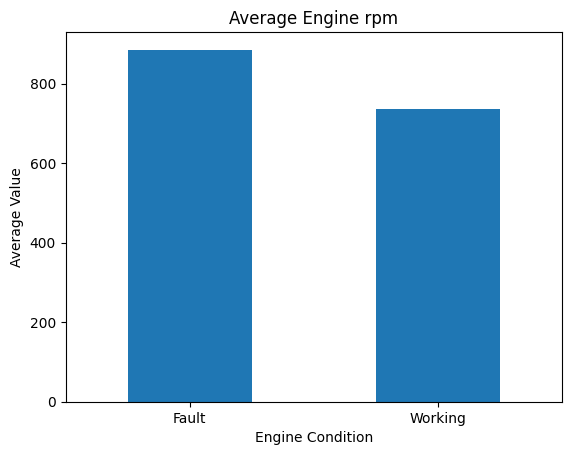

In [36]:
import matplotlib.pyplot as plt

def plot_feature_average(df, feature):
    # Calculate the mean grouped by 'Engine_Condition'
    group_means = df.groupby('Engine_Condition')[feature].mean()

    # Print the average values
    for condition, value in group_means.items():
        condition_name = 'Fault' if condition == 0 else 'Working'
        print(f"Average {feature} for {condition_name}: {value:.2f}")

    # Plot the average values
    group_means.plot(kind='bar', title=f'Average {feature}')
    plt.ylabel('Average Value')
    plt.xlabel('Engine Condition')
    plt.xticks(ticks=[0, 1], labels=['Fault', 'Working'], rotation=0)
    plt.show()

# Assuming your dataframe is named 'dataset'

# Call the function for each feature separately
plot_feature_average(dataset, 'Engine rpm')



Average Lub oil pressure for Fault: 3.22
Average Lub oil pressure for Working: 3.35


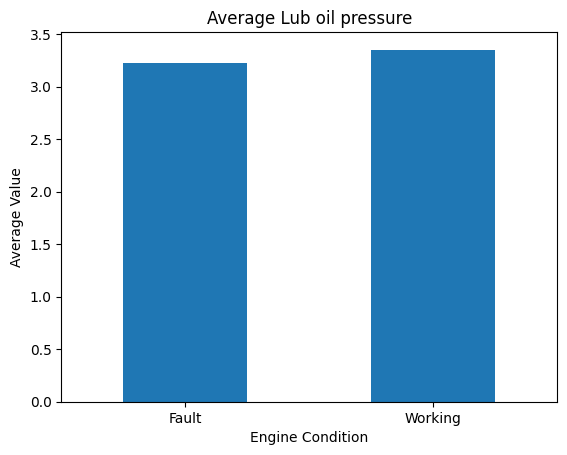

In [37]:
plot_feature_average(dataset, 'Lub oil pressure')


Average Fuel pressure for Fault: 6.24
Average Fuel pressure for Working: 6.90


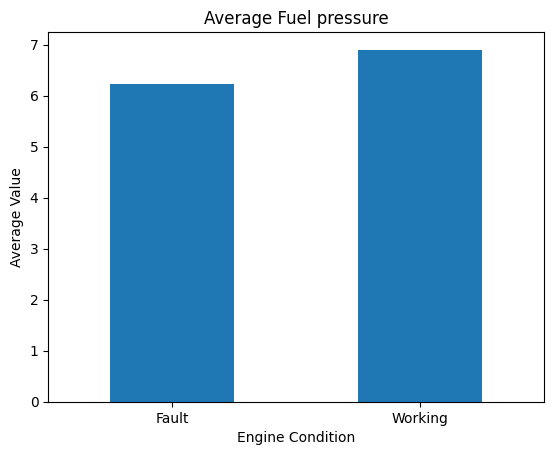

In [38]:
plot_feature_average(dataset, 'Fuel pressure')


Average Coolant pressure for Fault: 2.37
Average Coolant pressure for Working: 2.32


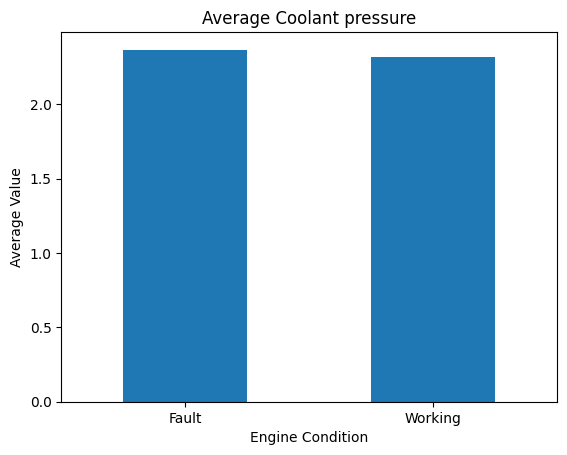

In [39]:
plot_feature_average(dataset, 'Coolant pressure')


Average lub oil temp for Fault: 78.02
Average lub oil temp for Working: 77.42


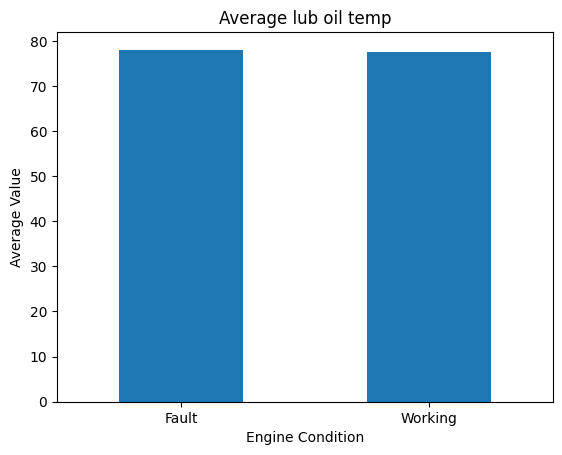

In [40]:
plot_feature_average(dataset, 'lub oil temp')


Average Coolant temp for Fault: 78.80
Average Coolant temp for Working: 78.21


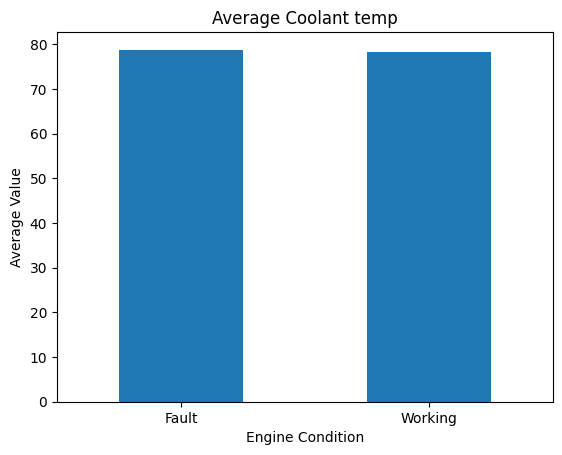

In [41]:
plot_feature_average(dataset, 'Coolant temp')

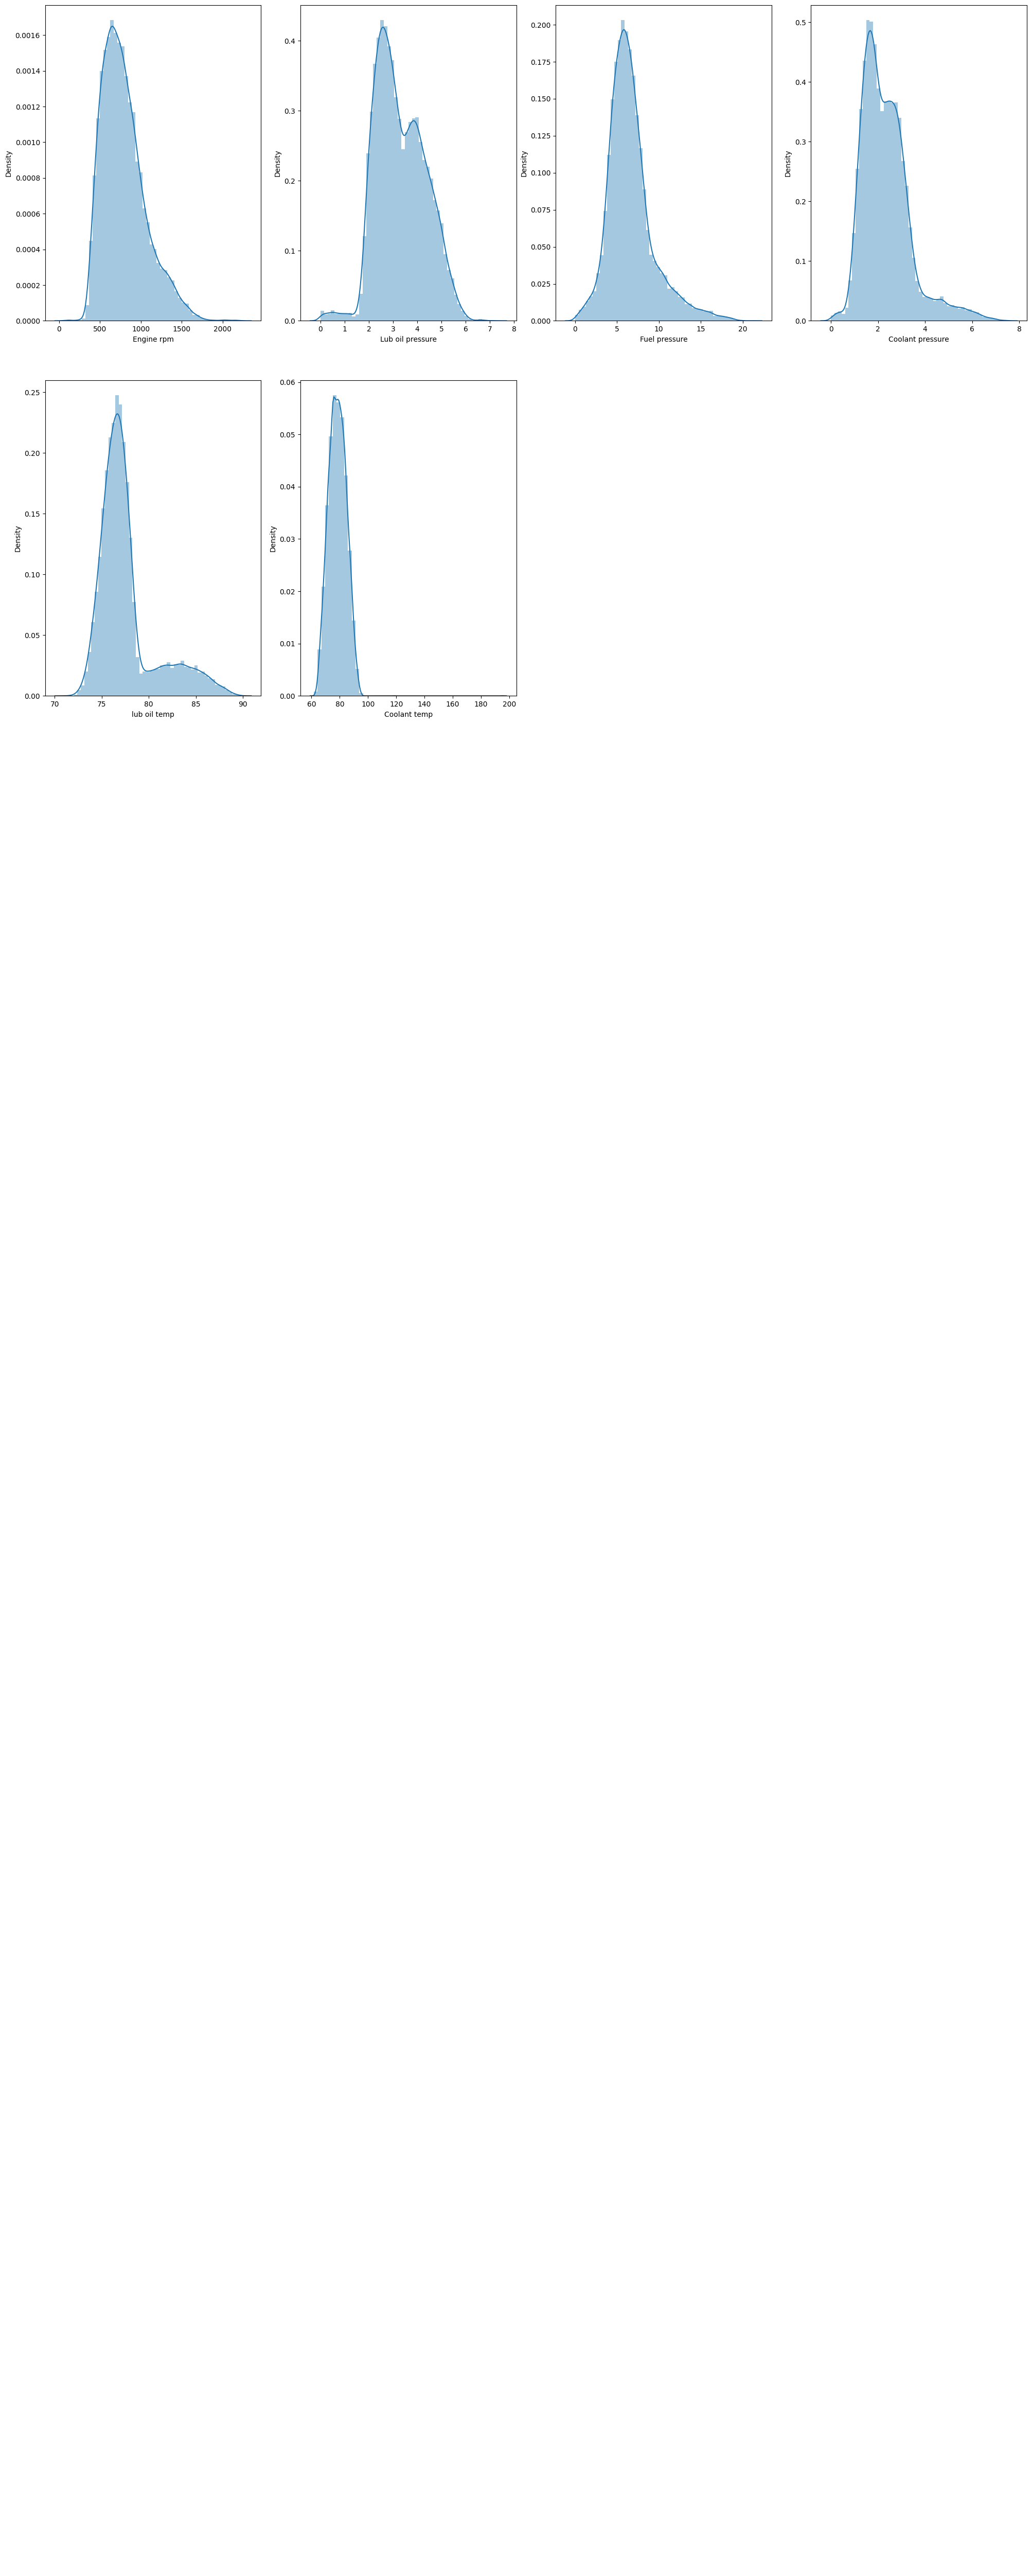

In [42]:
df_temp = df.drop(columns=['Engine_Condition'], axis=1)

# Create distribution plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

# Iterate over columns and create distribution plots
for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1

# Hide any unused subplots
for i in range(len(df_temp.columns), len(ax)):
    ax[i].axis('off')

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)
plt.show()

In [43]:
#Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
cm
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

For Logistic Regression


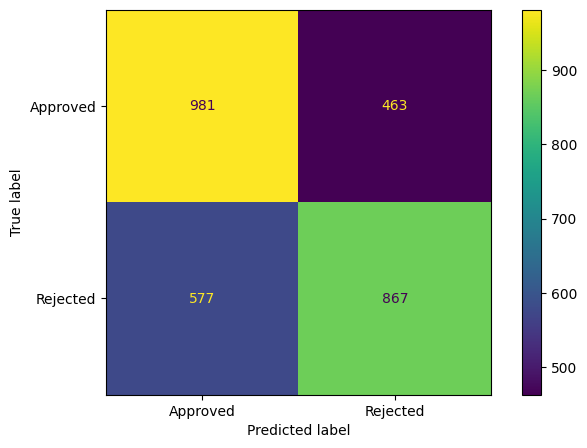

In [44]:
print("For Logistic Regression")
custom_confusion_matrix(
    Y_test, y_pred, display_labels=["Approved", "Rejected"]
)

For Decision Tree Classifier


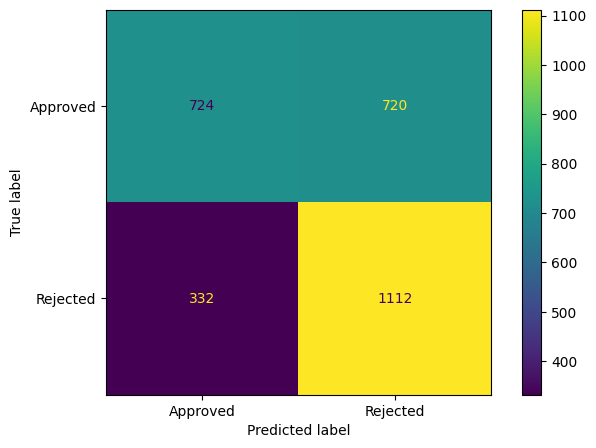

In [45]:
y_pred_dtc = model_dtc.predict(X_test)
print("For Decision Tree Classifier")
custom_confusion_matrix(
    Y_test, y_pred_dtc, display_labels=["Approved", "Rejected"]
)

Correlation Matrix


<Axes: >

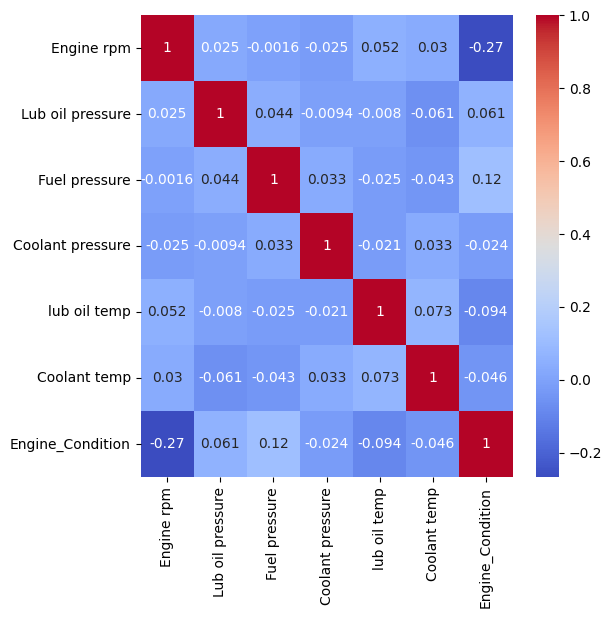

In [46]:
print('Correlation Matrix')
corr = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')